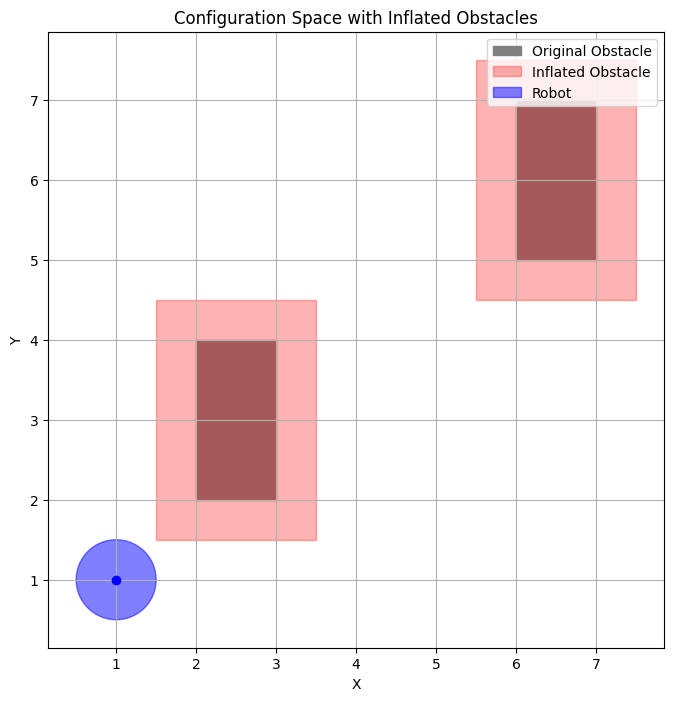

In [ ]:
import matplotlib.pyplot as plt

# Original obstacles defined by (x1, y1) = bottom-left, (x2, y2) = top-right
original_obstacles = [((2, 2), (3, 4)), ((6, 5), (7, 7))]
robot_radius = 0.5

# Function to inflate obstacles based on robot radius
def inflate_obstacles(obstacles, radius):
    inflated = []
    for (x1, y1), (x2, y2) in obstacles:
        inflated.append(((x1 - radius, y1 - radius), (x2 + radius, y2 + radius)))
    return inflated

# Setup the figure
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Configuration Space with Inflated Obstacles")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
ax.grid(True)

# Draw original obstacles
for (x1, y1), (x2, y2) in original_obstacles:
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, color='gray', label='Original Obstacle')
    ax.add_patch(rect)

# Draw inflated obstacles (C-space)
inflated_obstacles = inflate_obstacles(original_obstacles, robot_radius)
for index, ((x1, y1), (x2, y2)) in enumerate(inflated_obstacles):
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, color='red', alpha=0.3,
                          label='Inflated Obstacle' if index == 0 else "")
    ax.add_patch(rect)

# Draw robot at start position
robot_position = (1, 1)
robot_circle = plt.Circle(robot_position, robot_radius, color='blue', alpha=0.5, label='Robot')
ax.add_patch(robot_circle)
ax.plot(*robot_position, 'bo')  # robot center point

# Create legend without duplicates
handles, labels = ax.get_legend_handles_labels()
unique_dict = dict(zip(labels, handles))  # remove duplicate labels
ax.legend(unique_dict.values(), unique_dict.keys(), loc='upper right')

plt.show()